# Wine Quality Prediction

## Problem Statement

Predict the quality of the wine.

**Features**:

- fixed acidity
- volatile acidity
- citric acid
- residual sugar
- chlorides
- free sulfur dioxide
- total sulfur dioxide
- density
- pH
- sulphates
- alcohol
- Alcohol_content

**Labels**: 

- quality

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('wine.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Alcohol_content,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Low,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Medium,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Medium,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Medium,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Low,5


In [3]:
data.shape

(1599, 13)

In [4]:
# Any missing values ?

data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
Alcohol_content         0
quality                 0
dtype: int64

**As we have categorical column (Alcohol_Content), we need to convert into numeric data using encoding method.**

Content is following some order like Low, Med and High. We need to give weight according to the order.

In [5]:
from sklearn.preprocessing import OrdinalEncoder

In [6]:
oe = OrdinalEncoder(categories = [['Low','Medium','High']])

data['Alcohol_content'] = oe.fit_transform(data[['Alcohol_content']]) 

In [7]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Alcohol_content,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0.0,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1.0,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1.0,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1.0,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0.0,5


### Plotting Heatmap (Correlation matrix)

 - Let's try to see if we can reduce the features using different techniques
 - Let's plot heatmap to visualize and find the coefficient of multicollinearity

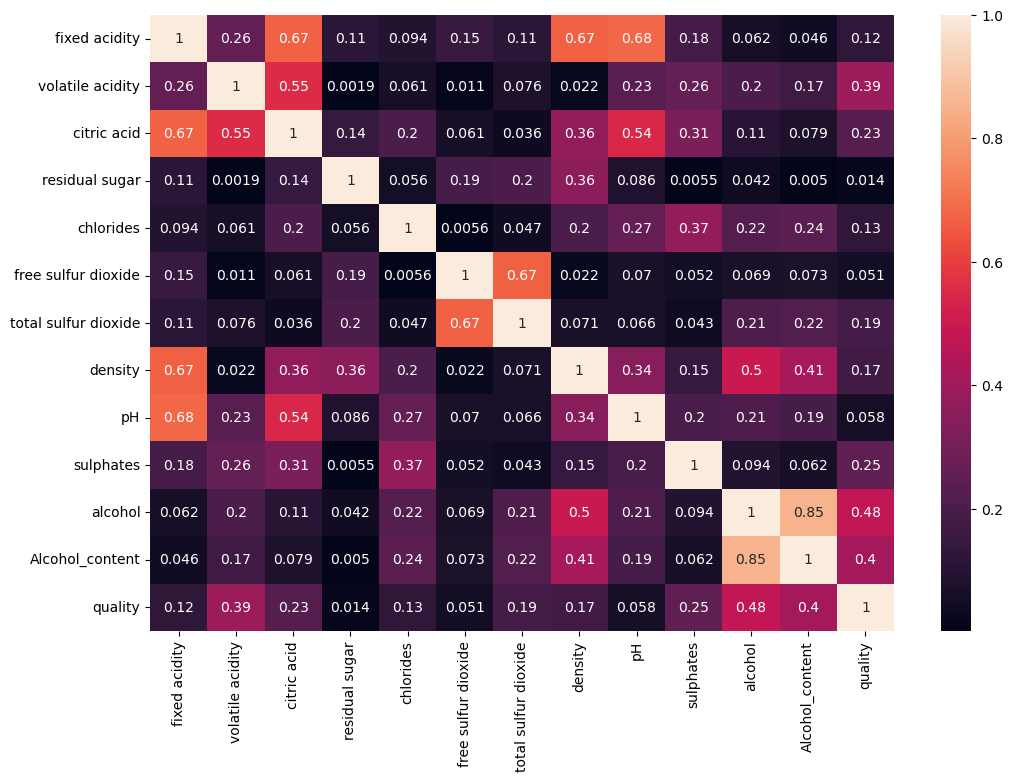

In [8]:
dff_corr = data.corr().abs()  # This will get the coefficient of one variable vs all other variable(Relationship)

plt.figure(figsize =(12,8))
sns.heatmap(dff_corr, annot = True, annot_kws ={'size':10})
plt.show()

Seems like Alcohol_content and alcohol are correlated as per above heat map. But we need more proof.

### Make sure they are really correlated (It should follow some trend)

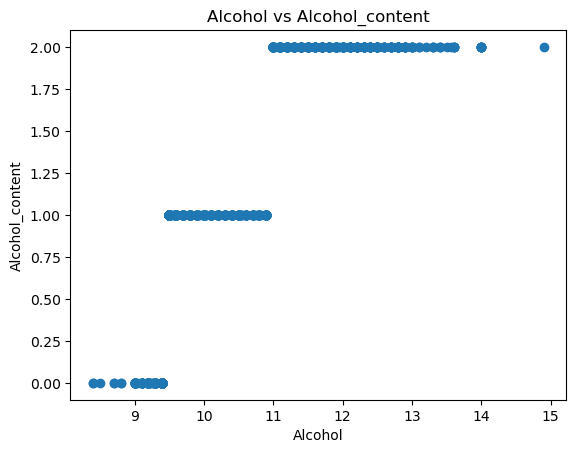

In [9]:
plt.scatter(data.alcohol, data.Alcohol_content)
plt.xlabel('Alcohol')
plt.ylabel('Alcohol_content')
plt.title('Alcohol vs Alcohol_content')
plt.show()

We see clear trend. As and when Alcohol level increases its content also increasing. So we can delete one of them.

In [10]:
X = data.drop(columns = ['quality','Alcohol_content'])
y = data.quality

In [11]:
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size = 0.25, random_state = 41)

In [12]:
def metric_score(clf, x_train,x_test,y_train,y_test, train = True):
    if train:
        train_pred = clf.predict(x_train)
        
        print('\n===============Train Result===============')
        
        print(f"Accuracy Score: {accuracy_score(y_train,train_pred) * 100:.2f}%")
        
    elif train == False:
        test_pred = clf.predict(x_test)
        
        print('\n===============Test Result================')
        print(f"Accuracy Score: {accuracy_score(y_test,test_pred) * 100: .2f}%")
        
        print('\n \n test Classification report \n', classification_report(y_test, test_pred,digits = 2))

In [13]:
# Model initiation

clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [14]:
# Call the function and pass dataset to check train and test score

metric_score(clf,x_train,x_test,y_train,y_test,train = True)  # This is for training score

metric_score(clf,x_train,x_test,y_train,y_test,train = False) # This is for testing score


===============Train Result===============
Accuracy Score: 100.00%

===============Test Result================
Accuracy Score:  61.25%

 
 test Classification report 
               precision    recall  f1-score   support

           3       0.20      0.33      0.25         3
           4       0.08      0.09      0.09        11
           5       0.69      0.67      0.68       157
           6       0.65      0.64      0.64       168
           7       0.50      0.51      0.50        57
           8       0.17      0.25      0.20         4

    accuracy                           0.61       400
   macro avg       0.38      0.42      0.39       400
weighted avg       0.62      0.61      0.62       400



In [15]:
# We are tuning four Important hyperparameters right now, we are passing the different values for both parameters

grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(10,15),
    'min_samples_leaf': range(2,6),
    'min_samples_split': range(3,8),
    'max_leaf_nodes': range(5,10) 
}

In [16]:
grid_search = GridSearchCV(estimator = clf,
                           param_grid = grid_param,
                           cv = 5,
                           n_jobs = -1)

In [17]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(10, 15),
                         'max_leaf_nodes': range(5, 10),
                         'min_samples_leaf': range(2, 6),
                         'min_samples_split': range(3, 8)})

In [18]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'entropy', 'max_depth': 10, 'max_leaf_nodes': 7, 'min_samples_leaf': 2, 'min_samples_split': 3}


If we don't get the best accuracy from above best_params_ then we have to tweak the value by adding/ substracting 1 or 2 from the given params

Ex - in above max_depth = 10 (from above) so if the accuracy did not improve then we will choose more 11,12 or less 9,8 and we do the same with all parameters. 

In [19]:
# Initiate DecisionTreeClassifier with new parameters and train
clf = DecisionTreeClassifier(criterion= 'gini', min_samples_split= 3, max_depth= 10, min_samples_leaf = 2)

# Train the model
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=3)

In [20]:
metric_score(clf,x_train,x_test,y_train,y_test,train = True)  # training score

metric_score(clf,x_train,x_test,y_train,y_test,train = False)  # testing score


===============Train Result===============
Accuracy Score: 83.40%

===============Test Result================
Accuracy Score:  62.00%

 
 test Classification report 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        11
           5       0.66      0.74      0.70       157
           6       0.66      0.62      0.64       168
           7       0.58      0.49      0.53        57
           8       0.00      0.00      0.00         4

    accuracy                           0.62       400
   macro avg       0.32      0.31      0.31       400
weighted avg       0.62      0.62      0.62       400



Our Model score approximately 83% on training data and 62% on testing data.